In [7]:
import pandas as pd

# Load the data
problem2_df = pd.read_csv("data/abalone.csv")

# Display the first few rows to understand the dataset
print(problem2_df.head())

# Identify features and target
features = problem2_df.columns[1:-1]  # All columns except the last one
# features = features.columns[1:]  # All columns except the last one
target = "Rings"  # Target variable

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [8]:
from sklearn.model_selection import train_test_split

# Split into features (X) and target (y)
X = problem2_df[features]
y = problem2_df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from Utils import plotEDF, makeEDF

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Plot Empirical Distribution Function (EDF) with DKW confidence bands
residuals = y_test - y_pred
edf_x, edf_y = makeEDF(residuals)

plotEDF(edf_x, edf_y, conf_band=True, alpha=0.05, label="Residual EDF")
plt.xlabel("Residual")
plt.ylabel("Cumulative Probability")
plt.title("EDF of Residuals with Confidence Bands")
plt.legend()
plt.show()

Mean Absolute Error: 1.629248267393658


ValueError: too many values to unpack (expected 2)

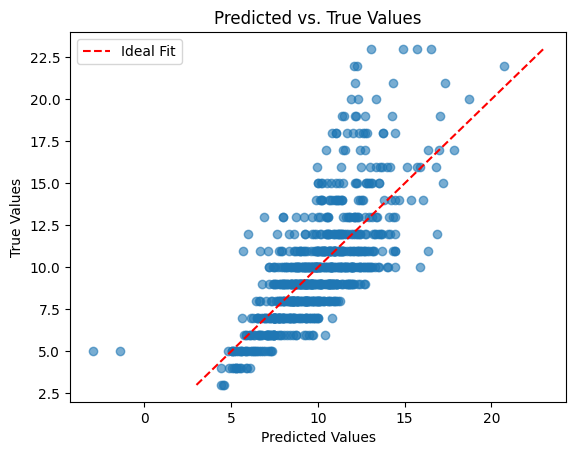

In [11]:
# Scatter plot
plt.scatter(y_pred, y_test, alpha=0.6)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Predicted vs. True Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Ideal Fit")
plt.legend()
plt.show()

In [23]:
import pandas as pd

# Load the dataset
problem3_df = pd.read_csv("data/visits_clean.csv", delimiter=' ')

# Display the first few rows to understand the structure
print(problem3_df.head())

# Inspect column names and decide target and features
print(problem3_df.columns)

   ofp  ofnp  opp  opnp  emr  hosp  exclhlth  poorhlth  numchron  adldiff  \
0    5     0    0     0    0     1         0         0         2        0   
1    1     0    2     0    2     0         0         0         2        0   
2   13     0    0     0    3     3         0         1         4        1   
3   16     0    5     0    1     1         0         1         2        1   
4    3     0    0     0    0     0         0         0         2        1   

   ...  midwest  west  age  male  married  school  faminc  employed  privins  \
0  ...        0     0  6.9     1        1       6  2.8810         1        1   
1  ...        0     0  7.4     0        1      10  2.7478         0        1   
2  ...        0     0  6.6     0        0      10  0.6532         0        0   
3  ...        0     0  7.6     1        1       3  0.6588         0        1   
4  ...        0     0  7.9     0        1       6  0.6588         0        1   

   medicaid  
0         0  
1         0  
2         1  


In [26]:
from sklearn.model_selection import train_test_split

# Define the target and features (modify as needed based on your dataset)
problem3_X = problem3_df.drop(columns=['ofp'])  # Replace with correct target column
problem3_y = problem3_df["ofp"]  # Replace with the actual target column name

# Perform the train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(problem3_X, problem3_y, test_size=0.2, random_state=42)

# Convert to numpy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [27]:
import numpy as np


class PoissonRegression:
    def __init__(self):
        self.alpha = None
        self.beta = None

    def loss(self, X, y):
        # X: feature matrix, y: target variable (visit count)
        # The parameter λ is given by exp(α⋅X + β)
        lambda_ = np.exp(np.dot(X, self.alpha) + self.beta)

        # Poisson log-likelihood loss
        loss_value = np.sum(y * (np.dot(X, self.alpha) + self.beta) - lambda_)
        return loss_value

    def fit(self, X_train, y_train):
        # Initialize alpha and beta with zeros
        self.alpha = np.zeros(X_train.shape[1])
        self.beta = 0

        # Implement gradient descent to minimize the loss function
        # You can use any optimization method (e.g., SGD, Gradient Descent)
        learning_rate = 0.01
        for _ in range(1000):
            predictions = np.exp(np.dot(X_train, self.alpha) + self.beta)
            gradient_alpha = np.dot(X_train.T, (y_train - predictions))
            gradient_beta = np.sum(y_train - predictions)

            # Update the parameters
            self.alpha += learning_rate * gradient_alpha
            self.beta += learning_rate * gradient_beta

    def predict(self, X):
        return np.exp(np.dot(X, self.alpha) + self.beta)

In [28]:
# Instantiate and fit the Poisson regression model
poisson_model = PoissonRegression()
poisson_model.fit(X_train, y_train)

/var/folders/zz/36b01_n10d5_rkg9ld_51cj80000gn/T/ipykernel_54267/252612018.py:27: RuntimeWarning: overflow encountered in exp
  predictions = np.exp(np.dot(X_train, self.alpha) + self.beta)


In [29]:
from sklearn.metrics import mean_absolute_error

# Make predictions on the test set
y_pred = poisson_model.predict(X_test)

# Compute the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Compare with a naive model (mean of the target in the training set)
naive_pred = np.mean(y_train)
naive_mae = mean_absolute_error(y_test, np.full_like(y_test, naive_pred))
print(f"Naive MAE: {naive_mae}")

ValueError: Input contains NaN.